In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Rendika Rahmaturrizki
- **Email:** m322d4ky2562@bangkit.academy
- **ID Dicoding:** ren245kar98

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas Udara di daerah Guanyuan dari tahun 2013 sampai dengan tahun 2017 ? (berdasarkan PM2.5)
- Komponen apa yang paling banyak terdapat pada Udara di daerah Guanyuan ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [4]:
# load data
df = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
5,6,2013,3,1,5,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,N,3.7,Guanyuan
6,7,2013,3,1,6,6.0,6.0,6.0,20.0,400.0,66.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Guanyuan
7,8,2013,3,1,7,3.0,3.0,7.0,26.0,400.0,61.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Guanyuan
8,9,2013,3,1,8,3.0,6.0,9.0,37.0,500.0,50.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Guanyuan
9,10,2013,3,1,9,7.0,11.0,9.0,30.0,400.0,58.0,1.2,1028.5,-19.3,0.0,N,2.6,Guanyuan


In [5]:
df.shape

(35064, 18)

### Assessing Data

In [6]:
# information about dataset feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
# checking missing value
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [8]:
# checking duplicated data
df.duplicated().sum()

0

### Cleaning Data

In [9]:
# checking value of feature that i dont know what the feature for
df['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [10]:
df['WSPM'].unique()

array([ 4.4,  4.7,  5.6,  3.1,  2. ,  3.7,  2.5,  3.8,  4.1,  2.6,  3.6,
        5.1,  4.3,  2.8,  3.9,  2.1,  0.8,  1.8,  1.4,  1.1,  1.7,  0.9,
        0.7,  1.2,  1.6,  2.7,  1.5,  1.3,  0.4,  2.3,  5.9,  2.9,  0. ,
        1. ,  0.5,  3. ,  2.4,  3.4,  3.5,  0.2,  1.9,  0.6,  3.3,  0.1,
        4.5,  7.7,  7.4,  7.9,  7.2,  6.7,  4.8,  4.6,  5.2,  4. ,  2.2,
        3.2,  6.5,  6.2,  7. ,  5. ,  4.2,  8.3,  5.4,  5.8,  7.3,  6.3,
        5.5,  6.1,  7.6,  6. ,  6.4,  6.6,  5.3,  4.9,  5.7,  7.1,  6.8,
        6.9,  7.5,  9.1,  8. ,  8.1,  8.4,  0.3,  nan, 11.2,  8.2,  8.5,
        9.2,  8.8,  8.9,  8.6])

In [11]:
# these features can be ignored so i dropping these
df_cleaned = df.drop(['wd', 'WSPM'], axis=1)

In [12]:
# imputate missing value
columns_to_fill = ['CO', 'SO2', 'NO2', 'O3', 'PM2.5', 'PM10']

mean_values = df_cleaned[columns_to_fill].mean()

df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna(mean_values)

In [13]:
# checking again
df_cleaned.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP       20
PRES       20
DEWP       20
RAIN       20
station     0
dtype: int64

In [14]:
# dropping missing value from feature that i think least impactful
value_to_drop = ['TEMP', 'PRES', 'DEWP', 'RAIN']

df_cleaned = df_cleaned.dropna(subset = value_to_drop)

In [15]:
# convert year to category data type for easier use
df_cleaned['year'] = df_cleaned.year.astype('category')

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35044 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   No       35044 non-null  int64   
 1   year     35044 non-null  category
 2   month    35044 non-null  int64   
 3   day      35044 non-null  int64   
 4   hour     35044 non-null  int64   
 5   PM2.5    35044 non-null  float64 
 6   PM10     35044 non-null  float64 
 7   SO2      35044 non-null  float64 
 8   NO2      35044 non-null  float64 
 9   CO       35044 non-null  float64 
 10  O3       35044 non-null  float64 
 11  TEMP     35044 non-null  float64 
 12  PRES     35044 non-null  float64 
 13  DEWP     35044 non-null  float64 
 14  RAIN     35044 non-null  float64 
 15  station  35044 non-null  object  
dtypes: category(1), float64(10), int64(4), object(1)
memory usage: 4.3+ MB


In [17]:
df_cleaned.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,Guanyuan


## Exploratory Data Analysis (EDA)

### Explore ...

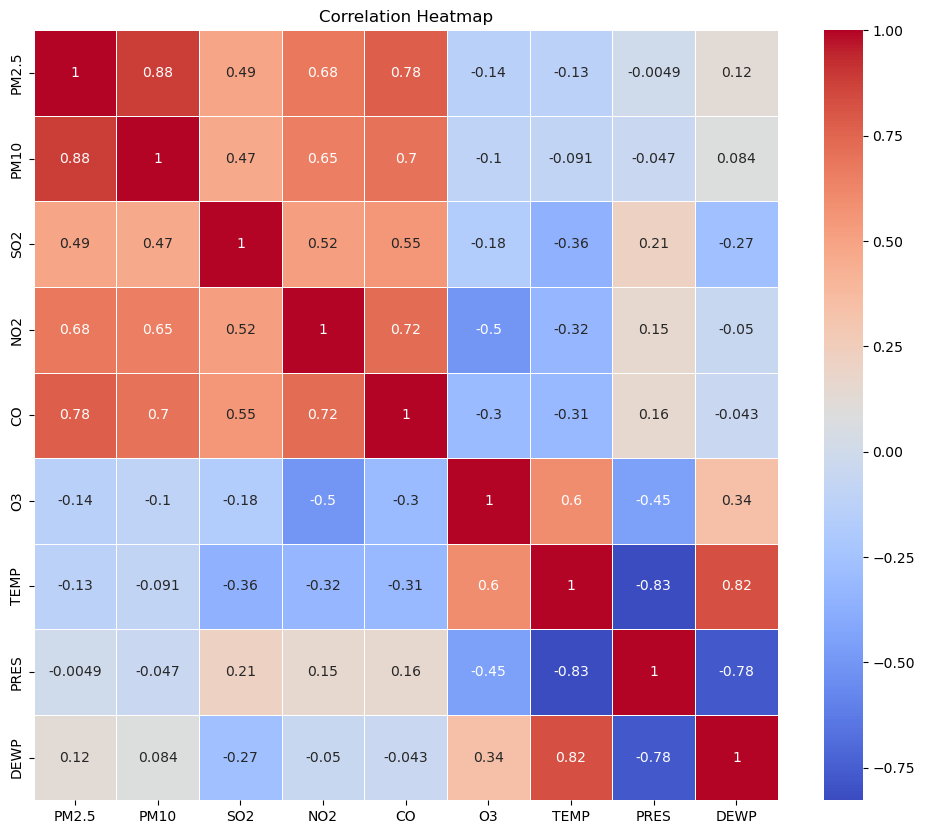

In [18]:
# making heatmap to find highest correlation with each feature
corr_matrix = df_cleaned.iloc[:,5:14].dropna().corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)

plt.title("Correlation Heatmap")
plt.show()

From heatmap, i can conclude that feature that have high correlation is PM2.5, PM10, CO, and NO2

In [19]:
# check distribution
df_cleaned.describe()

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000
mean,17524.582582,6.524455,15.726487,11.499486,82.931822,109.019378,17.592277,57.903755,1271.272288,55.783171,13.584607,1011.846920,3.123062,0.067421
std,10119.010388,3.447959,8.800813,6.922185,80.234204,91.027708,23.444528,34.823584,1135.452856,56.461038,11.399097,10.404047,13.688896,0.910056
min,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000
25%,8761.750000,4.000000,8.000000,5.000000,24.000000,41.000000,3.000000,31.000000,600.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000
50%,17524.500000,7.000000,16.000000,11.000000,61.000000,90.000000,9.000000,52.000000,1000.000000,44.000000,14.500000,1011.400000,3.800000,0.000000
75%,26285.250000,10.000000,23.000000,17.000000,113.000000,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,1020.100000,15.600000,0.000000
max,35064.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000


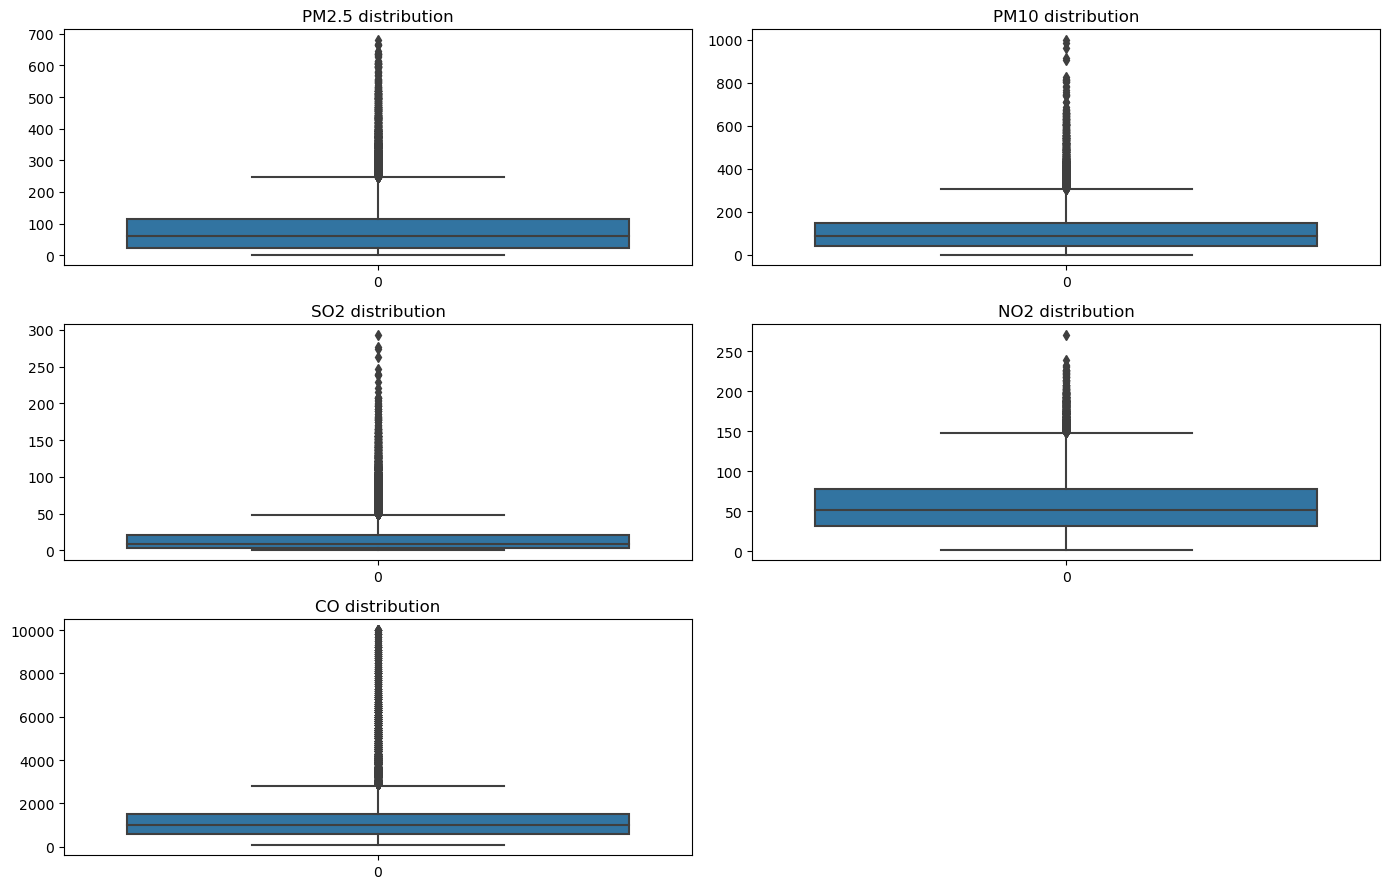


Outliers count for each specified feature:
PM2.5: 1650
PM10: 1231
SO2: 3216
NO2: 664
CO: 2846


In [20]:
# find outlier, count it, and then plot it
def plot_and_count_outliers(data, features):
    num_features = len(features)
    num_rows = (num_features + 1) // 2 # Adjusted to have 2 columns per row

    fig, ax = plt.subplots(num_rows, 2, figsize=(14, 3 * num_rows))
    ax = ax.flatten()
    outliers_count = {}

    for i, feature in enumerate(features):
        sns.boxplot(data[feature], ax=ax[i])
        ax[i].set_title("{} distribution".format(feature))

        # Calculate outliers
        q1 = data[feature].quantile(0.25)
        q3 = data[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Count outliers
        outliers_lower = data[data[feature] < lower_bound]
        outliers_upper = data[data[feature] > upper_bound]
        outliers_count[feature] = outliers_lower.shape[0] + outliers_upper.shape[0]

    # Remove any remaining unused subplots
    for i in range(num_features, len(ax)):
        fig.delaxes(ax[i])

    plt.tight_layout()
    plt.show()

    return outliers_count

# Specify the features you want to analyze
features_to_analyze = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO']

# Call the function with the specified features
outlier_counts = plot_and_count_outliers(df_cleaned, features_to_analyze)

# Print outlier counts for the specified features
print("\nOutliers count for each specified feature:")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count}")

In [21]:
# Function to replace outliers with the mean
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the mean
    mean = df[column].mean()
    df[column] = df[column].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

    return df

df_cleaned = replace_outliers_with_mean(df_cleaned, 'PM10')
df_cleaned = replace_outliers_with_mean(df_cleaned, 'SO2')
df_cleaned = replace_outliers_with_mean(df_cleaned, 'NO2')
df_cleaned = replace_outliers_with_mean(df_cleaned, 'CO')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas Udara di daerah Guanyuan dari tahun 2013 sampai dengan tahun 2017 ? (berdasarkan PM2.5)

In [22]:
# aggregate PM2.5 based on year
df_agg = df_cleaned.groupby('year').agg({
    'PM2.5' : 'mean'
}).reset_index()
df_agg

,year,PM2.5
0,2013,82.140551
1,2014,88.255731
2,2015,82.433113
3,2016,77.193992
4,2017,92.826668


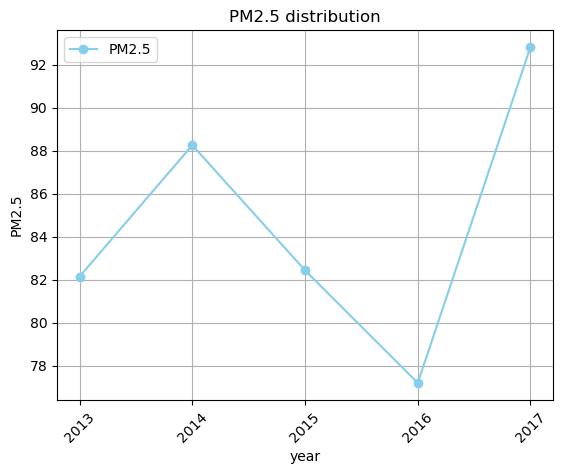

In [23]:
# plotting aggregate that has been made
df_agg.plot(x='year', y='PM2.5', kind='line', color='skyblue', marker='o')
plt.title('PM2.5 distribution')
plt.xlabel('year')
plt.ylabel('PM2.5')
plt.xticks(range(len(df_agg['year'].unique())), df_agg['year'].unique(), rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Komponen apa yang paling banyak terdapat pada Udara di daerah Guanyuan ?

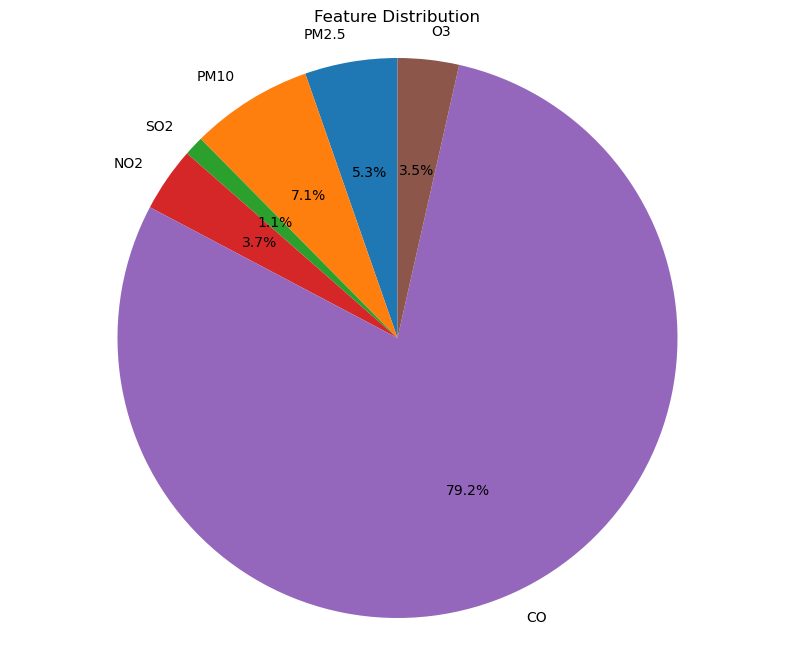

In [24]:
# feature that'll be count
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Calculate the total for each feature
total = df[features].sum().sum()

# Calculate the proportion of each feature relative to the total
proportions = df[features].sum() / total

# Create a pie chart for all features
plt.figure(figsize=(10, 8))
plt.pie(proportions, labels=features, autopct='%1.1f%%', startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Feature Distribution')
plt.show()


In [26]:
# export data cleaned to csv file 
df_cleaned.to_csv('dashboard/main_data.csv', index=False)

## Conclusion

#### **Bagaimana kualitas Udara di daerah Guanyuan dari tahun 2013 sampai dengan tahun 2017 ? (berdasarkan PM2.5)**
Berdasarkan hasil visualisasi yang sudah saya buat untuk component PM2.5, didapatkan bahwa jumlah komponen PM2.5 paling banyak ada pada tahun 2017. Berdasarkan catatan dan beberapa literatur yang sudah saya baca, PM2.5 mempengaruhi kualitas udara pada suatu daerah. PM2.5 adalah partikel yang sangat halus dengan diameter lebih kecil dari 2.5 mikron (mikrometer). Jadi kualitas Udara paling baik berada pada tahun 2017

#### **Komponen apa yang paling banyak terdapat pada Udara di daerah Guanyuan ?**
Berdasarkan hasil visualisasi yang sudah buat dengan pie chart didapatkan jawabannya, bahwa komponen udara yang paling banyak di daerah Guanyuan adalah CO, sedangkan perbandingan komponen CO dengan komponen yang lainnya sangatlah jauh. Jumlah paling sedikit berada pada komponen SO2